In [118]:
%matplotlib inline

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from nose.tools import *

import skimage.io
import io

import cv2
import numpy as np
import skimage.exposure
from PIL import Image

In [120]:
image = skimage.io.imread('mental_h_image.webp')

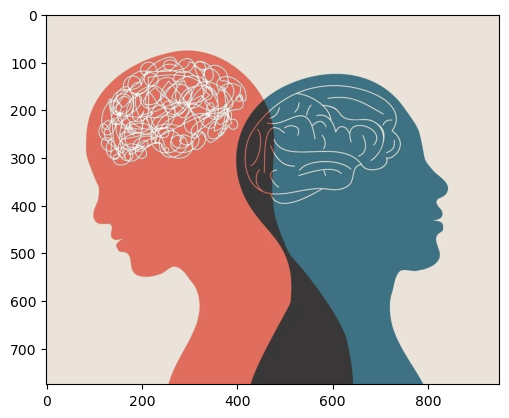

In [121]:
plt.imshow(image)

In [122]:
def threshold_image(image1, threshold):
    image = image1.copy()
    image[image <= threshold] = 0
    image[image > threshold] = 255
  
    return image

In [123]:
def convert_to_grayscale(image):
#     return ((image[:,:,0]+image[:,:,1]+image[:,:,2])/3).round(0)
    return (0.2989*image[:,:,0]+0.5870*image[:,:,1]+0.1140*image[:,:,2]).round(0)
#     return (0*image[:,:,0]+0*image[:,:,1]+1*image[:,:,2]).round(0)

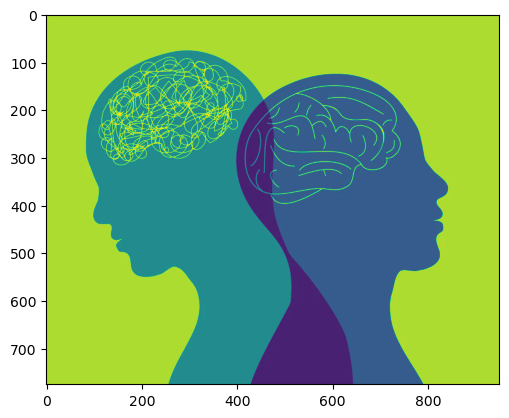

In [124]:
image = convert_to_grayscale(image)
plt.imshow(image)

In [125]:
image = threshold_image(image,200)
image.shape

(775, 950)

In [126]:
image = image.flatten()

In [127]:
image.shape

(736250,)

In [128]:
img = Image.new('L', (950, 775))
img.putdata(image)
img.save('image.png')

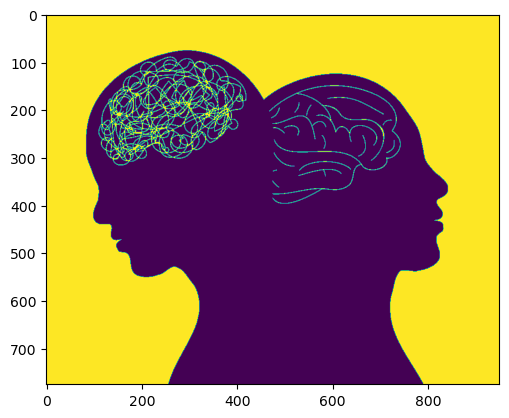

In [129]:
plt.imshow(img)

# Another approach

In [130]:
image1 = Image.open('mental_h_image.webp').convert('L')
image1 = np.asarray(image1)
image1.shape

(775, 950)

In [131]:
np.unique(image1)

array([ 36,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [132]:
# threshold using inRange
range11 = (0)
range21 = (200)
mask1 = cv2.inRange(image1,range11,range21)
mask1 = 255 - mask1 # this will decide if the heads or teh background should be black


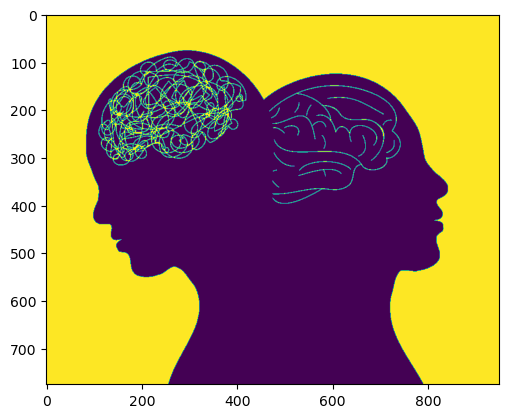

In [133]:
plt.imshow(mask1)

In [134]:
cv2.imwrite("image1.png", mask1)

True